In [ ]:
# // 600 500 300 200 50
# // 0.5 0.6 1   1.5 6

# // 600/500 = 1.2 -> * 0.5 = 0.6
# // ...
# // + sum crts up to level priced in egld
# // + sum shards up to level priced in egld
# // + sum tokens up to level priced in egld
# // + rarity in egld about perks 

# prendi tutti gli nft in vendita 
# al prezzo scala tutti gli elementi di valore normalizzando il prezzo in egld 
# per i characters lascia il prezzo di 0 tokens livello 1 rarita' nativa
# per le weapons lasclia il prezzo star uno livello 1

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_folder = '../public/data'
dfs = {}
for folder in os.listdir(data_folder):
    if os.path.isdir(os.path.join(data_folder, folder)):
        dfs[folder] = pd.read_json(os.path.join(data_folder, folder, 'nfts.json'), orient='index')  

In [26]:
tmp = pd.concat([dfs['CEA-2d29f9'], dfs['GSPACEAPE-08bc2b']]).value_counts('rarityClass').reset_index()
tmp['percent'] = round(tmp['count'] / tmp['count'].sum() *100, 2)
tmp

,rarityClass,count,percent
0,Bronze,5683,34.99
1,Silver,4871,29.99
2,Gold,2848,17.53
3,Epic,2034,12.52
4,Legendary,808,4.97


In [3]:
tmp = dfs["CRHEROES-9edff2"].value_counts('rarityClass').reset_index()
tmp['percent'] = round(tmp['count'] / tmp['count'].sum() *100, 2)
tmp

,rarityClass,count,percent
0,Gold,350,58.33
1,Epic,190,31.67
2,Legendary,60,10.00


In [11]:
tmp = pd.concat([dfs['CRMYTH-546419'], dfs['CRWEAPONS-e5ab49']]).value_counts(['name', 'starLevel']).reset_index()
tmp['percent'] = round(tmp['count'] / tmp['count'].sum() *100, 2)
tmp

,name,starLevel,count,percent
0,Dragonbreath,1.0,263,6.91
1,Boomstick-X,2.0,223,5.86
2,Mortar Gun X,2.0,219,5.76
3,Railgun-X,2.0,199,5.23
4,Blaster-X,2.0,195,5.12
5,Tesla Gun X,2.0,183,4.81
6,Railgun-X,3.0,152,3.99
7,Mortar Gun X,3.0,152,3.99
8,Mortar Gun X,1.0,152,3.99
9,Boomstick-X,3.0,150,3.94


In [ ]:
# heatmap perk1 perk2 for each rarity class (for genesis and for heroes)
# heatmap starLevel level for each weapons (crweapons and crmyth)
# heatmap level rarity for each characters (for genesis and for heroes)

In [43]:
import matplotlib.pyplot as plt

In [65]:
talents = pd.read_csv('game_data/Character.Talents.Info.csv')
talents

,ID,Name,Category,MinValue,MaxValue,Param1,Param2,Description
0,Overachiever,Talent_Overachiever_Name,1,1.0100,1.15,NaN,NaN,Talent_Overachiever_Desc
1,Hodler,Talent_Hodler_Name,2,1.0100,1.10,3.0,NaN,Talent_Hodler_Desc
2,Grounded,Talent_Grounded_Name,3,1.0200,1.12,2.5,NaN,Talent_Grounded_Desc
3,Stonewall,Talent_Stonewall_Name,3,0.0100,0.10,NaN,NaN,Talent_Stonewall_Desc
4,Adrenaline Rush,Talent_Adrenaline Rush_Name,2,1.0200,1.25,3.0,NaN,Talent_Adrenaline Rush_Desc
5,Overshield,Talent_Overshield_Name,1,250.0000,1200.00,NaN,NaN,Talent_Overshield_Desc
6,Black Widow,Talent_Black Widow_Name,2,200.0000,1000.00,NaN,NaN,Talent_Black Widow_Desc
7,Galvanized,Talent_Galvanized_Name,1,2.0000,10.00,NaN,NaN,Talent_Galvanized_Desc
8,Nano Meds,Talent_Nano Meds_Name,1,1.0025,1.05,NaN,NaN,Talent_Nano Meds_Desc
9,Resilience,Talent_Resilience_Name,1,1.0300,1.50,8.0,25.0,Talent_Resilience_Desc


In [115]:
shard_conversion = 1
token_conversion = 400

/tmp/ipykernel_32848/2039890545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['Level'] = tmp1['ID'].str.extract('(\d+)')
/tmp/ipykernel_32848/2039890545.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['Level'] = tmp1['Level'].astype(int)
/tmp/ipykernel_32848/2039890545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

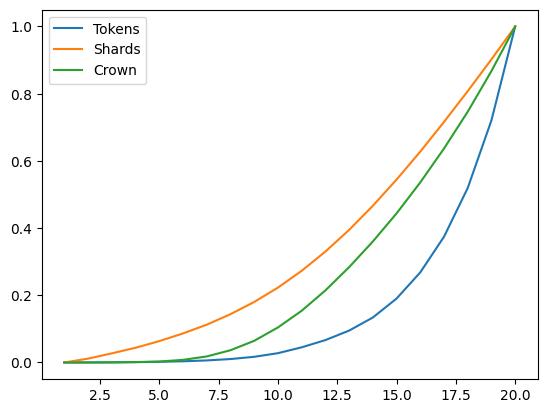

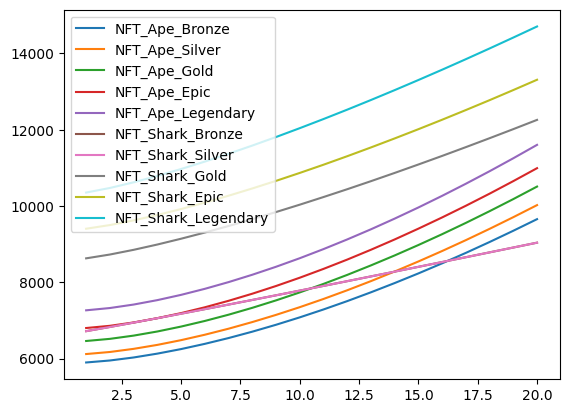

In [139]:
characters_info = pd.read_csv('game_data/Character.Info2.csv').filter(['ID', 'RaceID', 'Speed']).drop_duplicates()
tmp = pd.read_csv('game_data/Character.Levels.Stats.csv')
characters_info = pd.merge(characters_info, tmp, on='ID')
tmp = pd.read_csv('game_data/Character.Levels.Info.csv').filter(['Level', 'RequiredTokens'])
characters_info = pd.merge(characters_info, tmp, on='Level')
characters_info['nft'] = characters_info['ID'].str.startswith('NFT_')
tmp = pd.read_csv('game_data/PricePool.csv')
tmp1 = tmp[(tmp['ID'].str.startswith('price_ch_upgrade_lvl_')) & (tmp['ItemID']=='Shards')]
tmp1['Level'] = tmp1['ID'].str.extract('(\d+)')
tmp1['Level'] = tmp1['Level'].astype(int)
tmp1['nft'] = False
tmp1 = tmp1.rename(columns={'Amount': 'Shards'})
tmp1['Crown'] = 0
tmp1 = tmp1.filter(['Level', 'Shards', 'Crown', 'nft'])
tmp2 = tmp[tmp['ID'].str.startswith('price_ch_nft_upgrade_lvl_')]
tmp2['Level'] = tmp2['ID'].str.extract('(\d+)')
tmp2['Level'] = tmp2['Level'].astype(int)
tmp2 = tmp2.filter(['Level', 'ItemID', 'Amount'])
tmp2 = tmp2.pivot(index='Level', columns='ItemID', values='Amount').reset_index()
tmp2['nft'] = True
tmp = pd.concat([tmp1, tmp2])
characters_info = pd.merge(characters_info, tmp, on=['Level', 'nft'])
characters_upgrade = characters_info.filter(['Level', 'RequiredTokens', 'Shards', 'Crown', 'nft']).rename(columns={'RequiredTokens': 'Tokens'}).drop_duplicates()
characters_upgrade.to_csv('characters_upgrade.csv', index=False)
tmp1 = characters_upgrade[characters_upgrade['nft']==True].sort_values('Level')
tmp1['TokensCum'] = tmp1['Tokens'].cumsum()
tmp1['ShardsCum'] = tmp1['Shards'].cumsum()
tmp1['CrownCum'] = tmp1['Crown'].cumsum()
tmp1['TokensIncrementPercent'] = round(tmp1['Tokens'] / tmp1['TokensCum'] * 100, 2)
tmp1['ShardsIncrementPercent'] = round(tmp1['Shards'] / tmp1['ShardsCum'] * 100, 2)
tmp1['CrownIncrementPercent'] = round(tmp1['Crown'] / tmp1['CrownCum'] * 100, 2)
for col in ['Tokens', 'Shards', 'Crown']:
    colnormalized = tmp1[col+'Cum'] / tmp1[col].sum()
    plt.plot(tmp1['Level'], colnormalized, label=col)
plt.legend()
plt.show()

for character in characters_info[characters_info['ID'].str.startswith('NFT_')]['ID'].unique():
    tmp = characters_info[characters_info['ID']==character].sort_values('Level')
    data = tmp['Health'] + tmp['Shield'] / tmp['Health'].max() + tmp['Shield'].max()
    plt.plot(tmp['Level'], data, label=character)
plt.legend()
plt.show()

In [104]:
characters[characters['ID']=='NFT_Shark_Legendary'][['Crown', 'Shards', 'RequiredTokens']].sum()

Crown             3468100
Shards             961000
RequiredTokens      31572
dtype: int64

In [138]:
characters_info.drop_duplicates('ID')

,ID,RaceID,Speed,Level,Health,Shield,TalentPoints,SkillLevel,CrownEarnRate,RequiredTokens,nft,Shards,Crown
0,FREE_Character6,Ape,510,1,2500,1250,0,0,0.0,0,False,0,0
20,FREE_Character2,Bear,460,1,4000,750,0,0,0.0,0,False,0,0
40,FREE_Character3,Cat,560,1,2200,900,0,0,0.0,0,False,0,0
60,FREE_Character1,Tiger,510,1,2000,2000,0,0,0.0,0,False,0,0
80,FREE_Character4,Croco,460,1,1000,3200,0,0,0.0,0,False,0,0
100,FREE_Character5,Rabbit,560,1,1500,1500,0,0,0.0,0,False,0,0
120,FREE_Character7,Snail,575,1,500,2400,0,0,0.0,0,False,0,0
140,FREE_Character8,Shark,525,1,2000,2000,0,0,0.0,0,False,0,0
160,FREE_Character9,Squirrel,590,1,2300,750,0,0,0.0,0,False,0,0
180,FREE_Character10,Bull,500,1,1000,3200,0,0,0.0,0,False,0,0


In [16]:
characters_lvlup = {
    'level': [x for x in range(1, 20)],
    'crowns': [x for x in range(1, 20)],
    'shards': [x for x in range(1, 20)],
    'tokens': [x for x in range(1, 20)],
}
characters_lvlup = pd.DataFrame(characters_lvlup)
characters_lvlup

,level,crowns,shards,tokens
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,4,4,4
4,5,5,5,5
5,6,6,6,6
6,7,7,7,7
7,8,8,8,8
8,9,9,9,9
9,10,10,10,10


In [ ]:
collections = {
"genesis": ["CEA-2d29f9", "GSPACEAPE-08bc2b"],
"heroes": ["CRHEROES-9edff2"],
"weapons": ["CRWEAPONS-e5ab49", "CRMYTH-546419"],
}